# Step 1 - Read and Understanding the Data

In [1]:
# Import all the important libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [2]:
# Read the data -
bike  = pd.read_csv("/content/day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Information of the data
bike.shape

(730, 16)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Comments** -
- There are no null values in the data set
- Instant is redundant
- Except "dteday", all other variable are having appropriate data type.



# Step 2 - Data Cleaning

In [5]:
# instant is redundant. Drop the same
# We already have day, month, and year; therefore dteday is also redundant
# As per data dictionary, casual and registered sum up to cnt. Hence both the columns can be dropped.

bike.drop(["instant","dteday","casual","registered"], axis=1,inplace=True)

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [6]:
# Confirming the change of dtype for "dteday"
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [7]:
# Checking the statistical variance
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


Comments -
- For the continues variable, the mean and median are equal. Therefore the data is normally distributed.
- There are also no outliers.

In [8]:
# Checking for the duplicates -
bike_copy = bike.copy()
bike_copy.shape

(730, 12)

In [9]:
bike_copy.drop_duplicates(inplace = True)
bike_copy.shape

(730, 12)

Comments -
- There are no duplicates in the data.

In [10]:
# Convert "season" parameters to categorical
bike["season"] = bike["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

# Convert the "weathersit" parameters to categorical
bike["weathersit"] = bike["weathersit"].map({1:"clear", 2:"mist", 3:"light", 4:"heavy"})

# Convert the "mnth" parameters to categorical
bike["mnth"]=bike["mnth"].map({1:"Jan",2:"Feb",3:"March",4:"April",5:"May",6:"June",
                               7:"July",8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"})

# Convert the "weekday" parameters to categorical
bike["weekday"] = bike["weekday"].map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 3 - Data Visualisation and Analysis

**Univariate Analysis**

In [11]:
# Categorical Variable

categorical = [i for i in bike.columns if bike[i].nunique() <15]
categorical

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

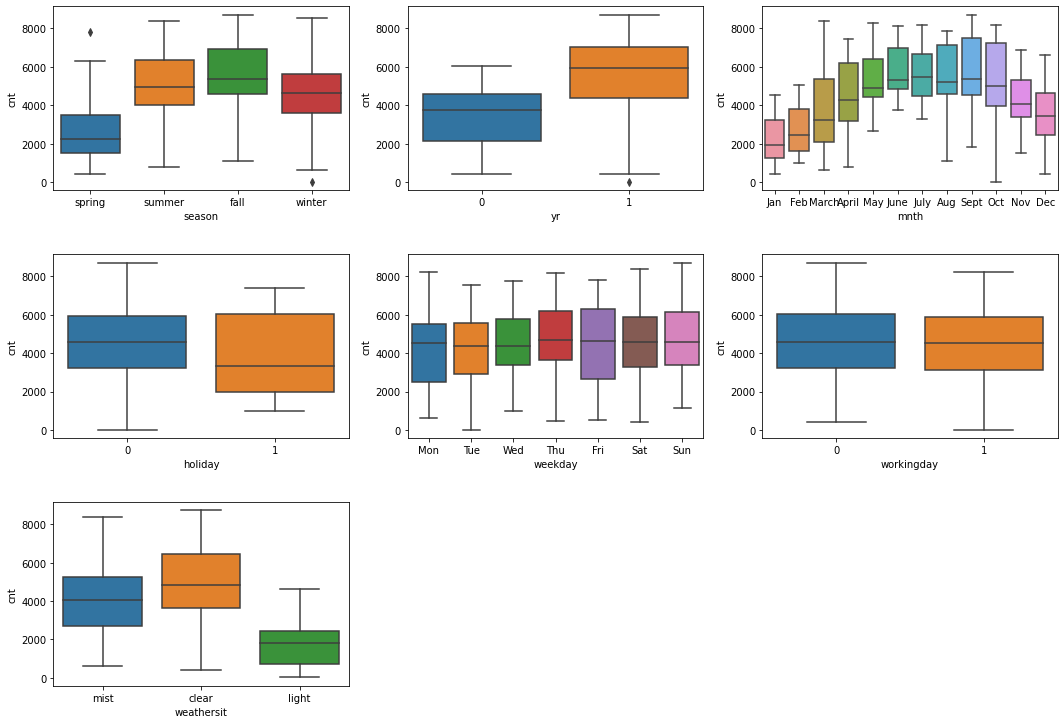

In [12]:
# Box plot for all categorical variables

plt.figure(figsize=(18,12.5))
for i in enumerate(categorical):
  plt.subplot(3,3,i[0]+1)
  sns.boxplot(x=i[1],y="cnt",data=bike)
plt.subplots_adjust(hspace=0.35)
plt.show()

In [13]:
# Group by each element and sum up the cnt for each category.
def uni(x,y="cnt"):
  sub_frame = bike[y].groupby(by=bike[x]).sum().reset_index()
  sns.barplot(x,y,data=sub_frame)

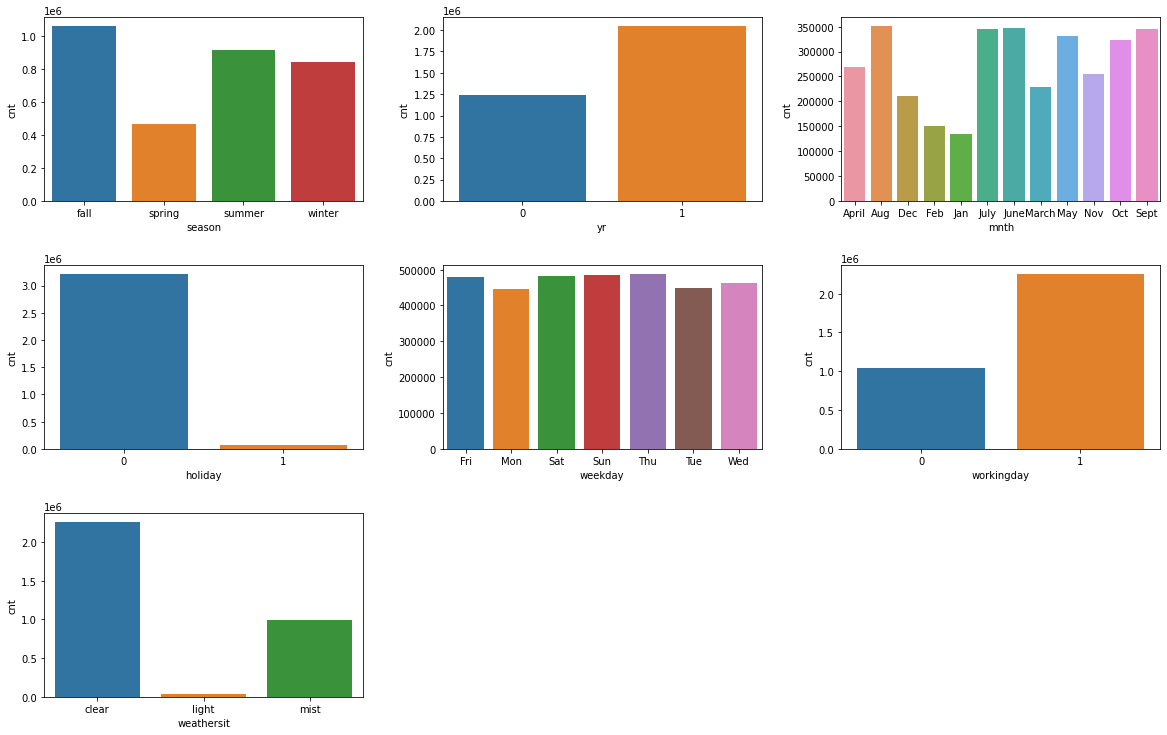

In [14]:
plt.figure(figsize=(20,12.5))
for i in enumerate(categorical):
  plt.subplot(3,3,i[0]+1)
  uni(x=i[1])
plt.subplots_adjust(hspace=0.35,wspace = 0.25)
plt.show()

Comments -
- The "fall" seasons has most numbers of rental bike counts.
- Year 2019 saw rise in the number of rental bike counts
- The month of June,July,August,and September seems to be the peek months for the rental bikes.
- The clear or partially cloudy weather situation is favourable for rental bikes.

**Bivariate Analysis**

<Figure size 432x288 with 0 Axes>

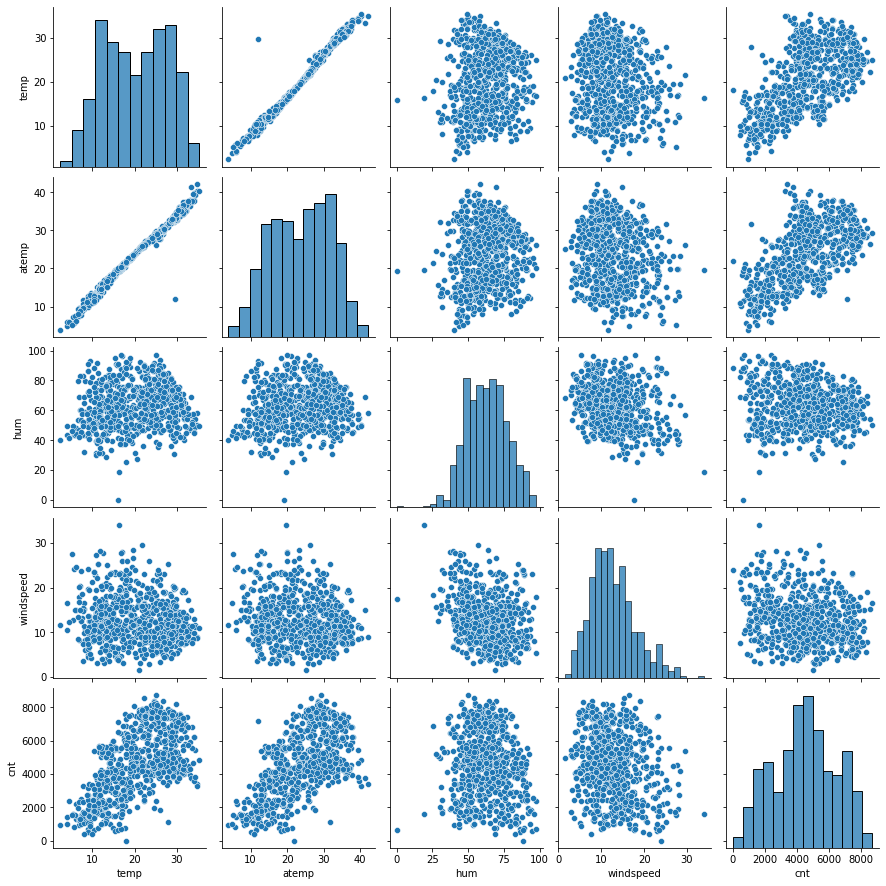

In [15]:
# Pair plot for continuous variable
cont = ["temp",	"atemp"	, "hum",	"windspeed","cnt"]
plt.figure()
sns.pairplot(bike[cont])
plt.show()


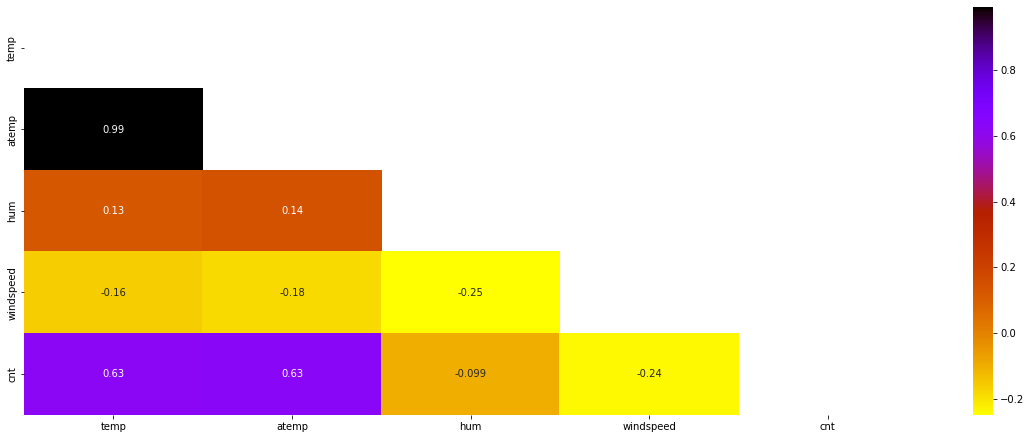

In [16]:
# Checking pearson coorelation within the numeric variables
plt.figure(figsize=(20,7.5))
mask = np.triu(bike[cont].corr())
sns.heatmap(bike[cont].corr(), annot=True, cmap = "gnuplot_r",mask=mask)
plt.show()

Comments - 
- "temp" and "atemp" are highly correlated
- There is linear relationship between "temp","atemp", and "cnt".

# Step 4 - Preparing the data for Modelling

In [17]:
# Create dummies
season = pd.get_dummies(bike["season"],drop_first=True)
mnth = pd.get_dummies(bike["mnth"],drop_first=True)
weekday = pd.get_dummies(bike["weekday"],drop_first=True)
weathersit = pd.get_dummies(bike["weathersit"],drop_first=True)

In [18]:
bike_1 = pd.concat([bike,season,mnth,weekday,weathersit],axis=1)
bike_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,light,mist
0,spring,0,Jan,0,Mon,1,mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,1,mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [19]:
bike_1.drop(["season","mnth","weekday","weathersit"],axis = 1,inplace=True)
bike_1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,light,mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Train_test_split

from sklearn.model_selection import train_test_split

df_train , df_test = train_test_split(bike_1,train_size = 0.7,random_state =100)
df_train.shape

(510, 30)

In [21]:
# Applying the scaling to the muneric variables

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[cont] = scaler.fit_transform(df_train[cont])

In [22]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,light,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# X and y split.
y_train = df_train.pop("cnt")
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,light,mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,1,0,0,0,0,1


**Feature selection using RFE**

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [25]:
linear = LinearRegression()
linear_reg = linear.fit(X_train,y_train)

In [26]:
rfe = RFE(estimator=linear_reg,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [27]:
list(zip(X_train,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('March', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sept', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thu', False, 14),
 ('Tue', False, 7),
 ('Wed', False, 11),
 ('light', True, 1),
 ('mist', True, 1)]

In [28]:
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sept', 'light', 'mist'],
      dtype='object')

In [29]:
# Checking the variables which are rejected -
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'June', 'March', 'May', 'Oct',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

# Step 5 - Model Training
- Using Mix approach of automated and manual feature selection.

**Model # 1**
- Consiider following variables -

  ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer','winter', 'Dec', 'Jan', 'July', 'Nov', 'Sept', 'light', 'mist']

In [31]:
import statsmodels.api as sm

In [32]:
X_train_1 = X_train[cols]
X_train_1.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Dec,Jan,July,Nov,Sept,light,mist
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


In [33]:
X_train_1_sm = sm.add_constant(X_train_1)

In [34]:
lr_1 = sm.OLS(y_train,X_train_1_sm).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          8.15e-189
Time:                        07:48:24   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.0

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X_train_1
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] ,2)
vif.sort_values(by = "VIF", ascending = False,inplace = True)
vif

,features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,mist,2.32
0,yr,2.09
11,Nov,1.85
9,Jan,1.75


**Model # 2**
- Considering the high VIF value of "hum", the same will be dropped.

In [36]:
X_train_2 = X_train_1.drop(["hum"],axis = 1)

X_train_2_sm = sm.add_constant(X_train_2)

lr_2 = sm.OLS(y_train,X_train_2_sm).fit()

print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          4.75e-186
Time:                        07:48:24   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.0

In [37]:
X = X_train_2
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] ,2)
vif.sort_values(by = "VIF", ascending = False,inplace = True)
vif

,features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,yr,2.07
10,Nov,1.81
8,Jan,1.66
9,July,1.59
13,mist,1.57


**Model # 3**
- Based on p-value, we will remove "Nov" variable.

In [38]:
X_train_3 = X_train_2.drop(["Nov"],axis = 1)

X_train_3_sm = sm.add_constant(X_train_3)

lr_3 = sm.OLS(y_train,X_train_3_sm).fit()

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          2.74e-186
Time:                        07:48:24   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2283      0.031      7.310      0.0

In [39]:
X = X_train_3
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] ,2)
vif.sort_values(by = "VIF", ascending = False,inplace = True)
vif

,features,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.89
5,summer,2.24
0,yr,2.07
6,winter,2.05
8,Jan,1.65
9,July,1.59
12,mist,1.57
10,Sept,1.34


**Model # 4**
- The variable "Dec" is not significant. Therefore we drop the same.

In [40]:
X_train_4 = X_train_3.drop(["Dec"],axis = 1)

X_train_4_sm = sm.add_constant(X_train_4)

lr_4 = sm.OLS(y_train,X_train_4_sm).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          8.14e-187
Time:                        07:48:24   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2154      0.030      7.088      0.0

In [41]:
X = X_train_4
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] ,2)
vif.sort_values(by = "VIF", ascending = False,inplace = True)
vif

,features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,yr,2.07
6,winter,1.78
7,Jan,1.61
8,July,1.59
11,mist,1.56
9,Sept,1.34


**Model # 5**
- The variable "Jan" is not significant. We drop the variable.

In [42]:
X_train_5 = X_train_4.drop(["Jan"],axis = 1)

X_train_5_sm = sm.add_constant(X_train_5)

lr_5 = sm.OLS(y_train,X_train_5_sm).fit()

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          5.06e-187
Time:                        07:48:24   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.0

In [43]:
X = X_train_5
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] ,2)
vif.sort_values(by = "VIF", ascending = False,inplace = True)
vif

,features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.78
7,July,1.58
10,mist,1.55
8,Sept,1.34
9,light,1.08


**Model # 6**
- Remove insignificant variable "July".

In [44]:
X_train_6 = X_train_5.drop(["July"],axis = 1)

X_train_6_sm = sm.add_constant(X_train_6)

lr_6 = sm.OLS(y_train,X_train_6_sm).fit()

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.47e-186
Time:                        07:48:24   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1909      0.030      6.447      0.0

In [45]:
X = X_train_6
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] ,2)
vif.sort_values(by = "VIF", ascending = False,inplace = True)
vif

,features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,mist,1.55
7,Sept,1.23
8,light,1.08
1,holiday,1.04


Model # 6 seems to be a good model because the multicolinearity among the 10 predictor variables are low and p-value of all coefficient are also low indicating that they are significant.

Also the p-value for overall model is also low indicating overall model is significant.

# Step 6 - Residual Analysis

In [47]:
# Prediction
y_train_pred = lr_6.predict(X_train_6_sm)
res_train = y_train - y_train_pred

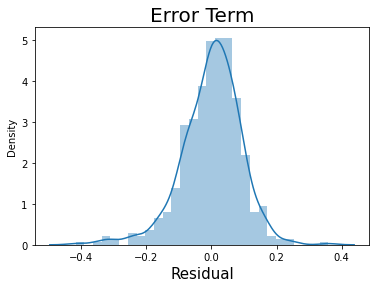

In [48]:
# Plot the distribution of the residuals
plt.figure()
sns.distplot(res_train)
plt.xlabel("Residual",fontsize=15)
plt.title("Error Term",fontsize=20)
plt.show()

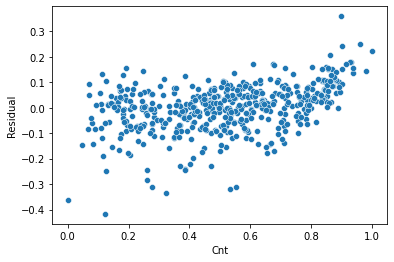

In [49]:
# Error terms must be indenpendent
plt.figure()
sns.scatterplot(y_train,res_train)
plt.xlabel('Cnt')
plt.ylabel('Residual')
plt.show()

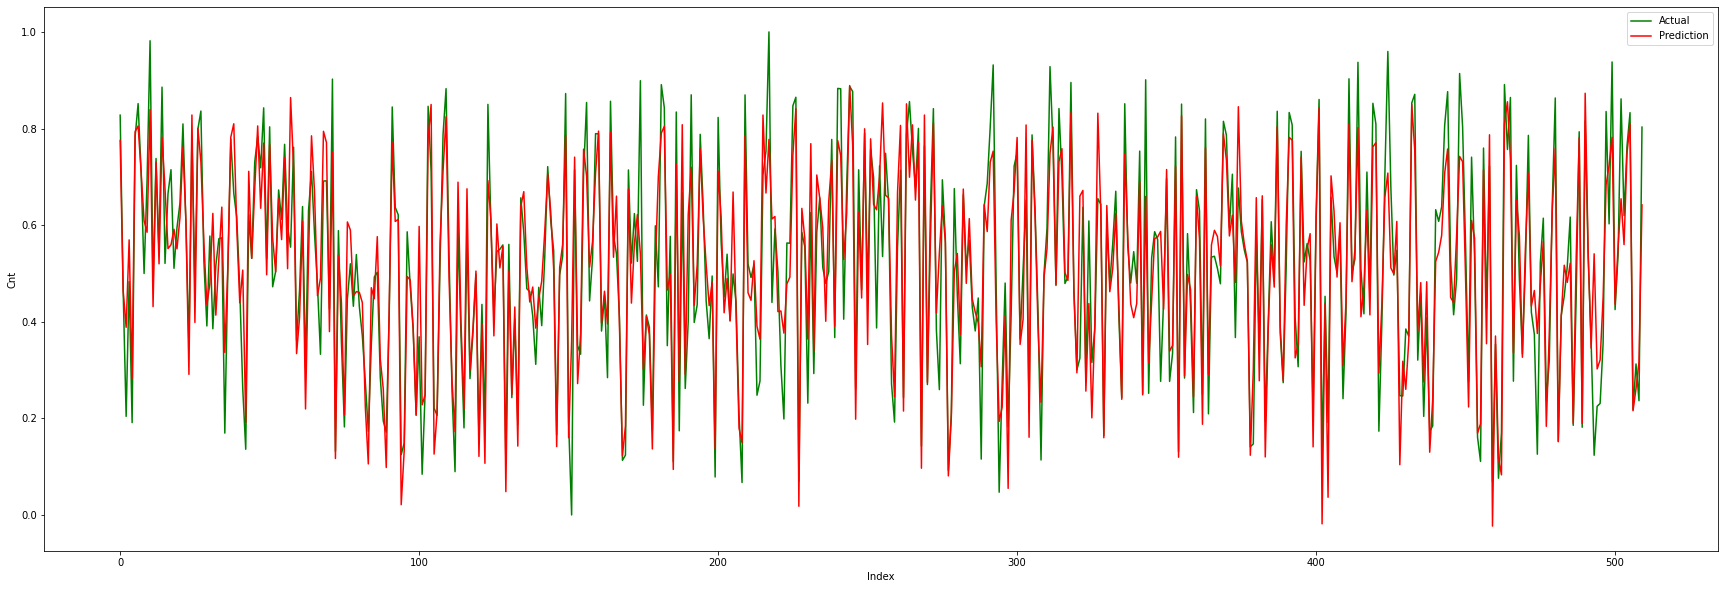

In [50]:
# Find the pattern within the residual.

plt.figure(figsize=(30,10))
x=list(range(len(res_train)))
line_1 = plt.plot(x,y_train,color="green",label="Actual")
line_2 = plt.plot(x,y_train_pred,color="red",label="Prediction")
plt.xlabel("Index")
plt.ylabel("Cnt")
line = line_1+line_2
label = [l.get_label() for l in line]
plt.legend(line,label, loc='best')
plt.show()

**The error terms are normally distributed and there is no pattern within the error terms. Also the predicted value is almost overlapping the actual values**

# Step 7 - Predictions and Evaluation on Test Set

In [51]:
# Read the test set
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,light,mist
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,0,0


In [52]:
# Scale and transform the continuous values
df_test[cont] = scaler.transform(df_test[cont])
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,light,mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# X and y split
y_test = df_test.pop("cnt")
X_test = df_test
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,light,mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [54]:
# Add constant to the test data - 
X_test_sm = sm.add_constant(X_test) 

In [55]:
X_test_sm = X_test_sm[X_train_6_sm.columns]
X_test_sm.shape

(220, 11)

In [56]:
y_test_pred = lr_6.predict(X_test_sm)

**Calculate the R Square on the test data set**

In [57]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_test_pred)
round(r2,4)

0.8038

Comments -
- The trained model is able to explain approximately 80 percent variation in the test data. This is very close to that of train data set.

**Model Evaluation using test data set**

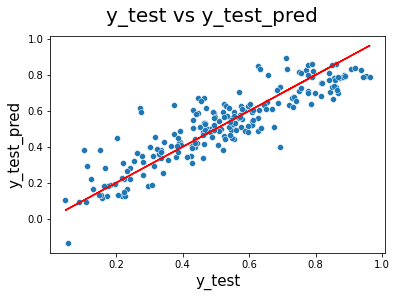

In [62]:
# Plot the graph for y_test vs y_test_pred :
fig = plt.figure()
sns.scatterplot(y_test,y_test_pred)
plt.plot(y_test,y_test,color="r")
plt.xlabel("y_test",fontsize=15)
plt.ylabel("y_test_pred",fontsize=15)
fig.suptitle("y_test vs y_test_pred",fontsize=20,)
plt.show()

In [59]:
# Calculating adjusted r2
adjusted_r2 = round(1 - ((1-r2)*(X_test_sm.shape[0]-1)/(X_test_sm.shape[0]-X_test_sm.shape[1]-1)),4)
adjusted_r2

0.7934

Comments -
- The variance of the error terms are very less across all the values of y variable. 
- The adjusted R square(0.7934) value is also very close to the adjusted R square value of the trained model(0.829). This shows the model fits well even on unseen data set. The difference is less than 5 percent

# Interpretation of Final Model


**Hypothesis Testing:**

Hypothesis testing states that:

- H0:B1=B2=...=Bn=0
- H1: at least one Bi!=0

In [60]:
# Coefficients of the Final model.
print("The beta values for the best fitted line is -")
print(round(lr_6.params,4))

The beta values for the best fitted line is -
const        0.1909
yr           0.2341
holiday     -0.0963
temp         0.4777
windspeed   -0.1481
spring      -0.0554
summer       0.0621
winter       0.0945
Sept         0.0910
light       -0.2850
mist        -0.0787
dtype: float64


Comments -
- From the lr_6 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

**F Statistics**

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 248.4
- Prob (F-statistic): 1.47e-186

The F-Statistics value of 248.4 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

**Explanation of Important Variable**
- Demand of rental bikes is positively correlated to year, temp, and mnth(September). 
- And negatively correlated with holiday ,windspeed, Season(Spring,Summer,Winter), and weathersit(Light snow, and Mist).
- The change in the magnitude of output will depend upon the magnitude of the coefficient of each variable.
 